In [ ]:
pip install mediapipe opencv-python

In [1]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os
import skimage.io as imageio
import math

In [2]:
lips = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291, 375, 321, 405, 314, 17, 84, 181, 91, 146, 61, 78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95, 78]
left_eyes = [263, 249, 390, 373, 374, 380, 381, 382, 362, 466, 388, 387, 386, 385, 384, 398, 362]
right_eyes = [33, 7, 163, 144, 145, 153, 154, 155, 133, 246, 161, 160, 159, 158, 157, 173, 133]
lips1 = [0,17,61,291]
right_eyes1 = [159, 145, 133, 33] 
left_eyes1 = [386, 374, 362, 263]
features = lips1 + left_eyes1 + right_eyes1

337 337 3


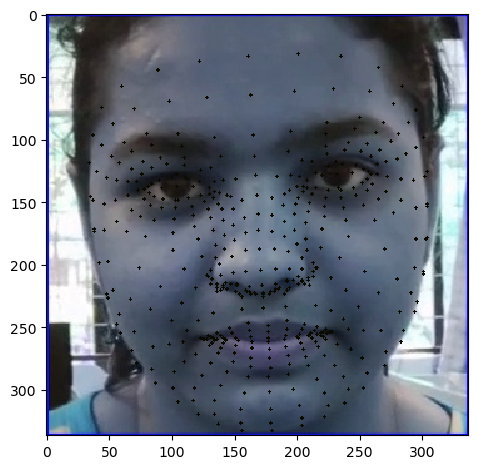

In [8]:
image = cv2.imread("truth/face321.jpg")

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Facial landmarks
result = face_mesh.process(rgb_image)

height, width, _ = image.shape
for facial_landmarks in result.multi_face_landmarks:
    for i in range(0,478):
        pt1 = facial_landmarks.landmark[i]
        x = int(pt1.x * width)
        y = int(pt1.y * height)
#         print(x,y)
        cv2.circle(image, (x, y), 1, (10, 10, 0), -1)
        
print(height,width,_)
imageio.imshow(image);

177 249
179 283
123 259
228 254
337 337 3


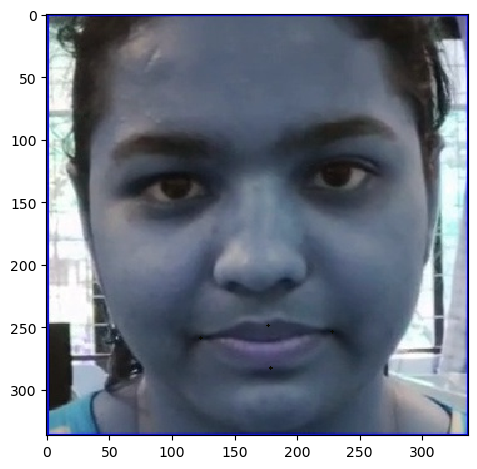

In [4]:
image = cv2.imread("truth/face321.jpg")

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Facial landmarks
result = face_mesh.process(rgb_image)

height, width, _ = image.shape
for facial_landmarks in result.multi_face_landmarks:
    for i in lips1:
        pt1 = facial_landmarks.landmark[i]
        x = int(pt1.x * width)
        y = int(pt1.y * height)
        print(x,y)
        cv2.circle(image, (x, y), 1, (10, 10, 0), -1)
        
print(height,width,_)
imageio.imshow(image);

In [5]:
# [0,17,61,291]

def get_lip_ratio(result):
    for facial_landmarks in result.multi_face_landmarks:
        pt_bottom = facial_landmarks.landmark[0]
        x_bottom = int(pt_bottom.x * width)
        y_bottom = int(pt_bottom.y * height)
        pt_top = facial_landmarks.landmark[17]
        x_top = int(pt_top.x * width)
        y_top = int(pt_top.y * height)
        pt_left = facial_landmarks.landmark[61]
        x_left = int(pt_left.x * width)
        y_left = int(pt_left.y * height)
        pt_right = facial_landmarks.landmark[291]
        x_right = int(pt_right.x * width)
        y_right = int(pt_right.y * height)
        # aspect ratio
        h = math.dist((x_bottom, y_bottom),(x_top, y_top))
        w = math.dist((x_left, y_left),(x_right, y_right))
        return h / w

Frame:  130
No Compression
Frame:  131
No Compression
Frame:  132
No Compression
Frame:  133
Lip Compression
Frame:  134
No Compression
Frame:  135
No Compression
Frame:  136
No Compression
Frame:  137
Lip Compression
Frame:  138
No Compression
Frame:  139
No Compression
Frame:  140
No Compression
Frame:  141
No Compression
Frame:  142
No Compression
Frame:  143
No Compression
Frame:  144
Lip Compression
Frame:  145
No Compression
Frame:  146
No Compression
Frame:  147
No Compression
Frame:  148
No Compression
Frame:  149
No Compression
Frame:  150
No Compression
Frame:  151
No Compression
Frame:  152
No Compression
Frame:  153
No Compression
Frame:  154
No Compression
Frame:  155
Lip Compression
Frame:  156
No Compression
Frame:  157
No Compression
Frame:  158
No Compression
Frame:  159
No Compression
Frame:  160
Lip Compression
Frame:  161
Lip Compression
Frame:  162
No Compression
Frame:  163
No Compression
Frame:  164
Lip Compression
Frame:  165
Lip Compression
Frame:  166
Lip Comp

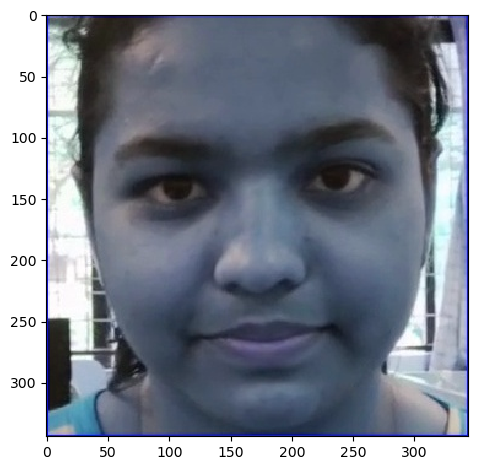

In [6]:
LIP_COMPRESSION_RATIO = .35 # from testing, ~universal

for i in range(130,186):
    img = cv2.imread("lie/face"+str(i)+".jpg")
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)
    rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = face_mesh.process(rgb_image)
    print("Frame: ",i)
    # print(get_lip_ratio(result))
    if get_lip_ratio(result) < LIP_COMPRESSION_RATIO:
        print("Lip Compression")
    else:
        print("No Compression")
    
    imageio.imshow(img);